This work was done by YK and PM.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist

# A06.1 Exponential Random Graph Models
Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models.

For each of the WTW networks provided:
- Measure the average clustering and reciprocity coefficients.
- Fit the Undirected Binary CM and Directed Binary CM.
- Sample 30 networks from the obtained distributions and measure clustering and reciprocity. Calculate average and standard error on each measure.
- Plot clustering and reciprocity as functions of time, comparing the real value with the average and error bars from samples.

In [1]:
# Read the datasets
import os

def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        if "WDN" in entry:
            allFiles.append(entry)
    return allFiles

myfiles = getListOfFiles('./data/World_Trade_Web/')
myfiles

['WDN_1992.txt.graphml',
 'WDN_1993.txt.graphml',
 'WDN_1994.txt.graphml',
 'WDN_1995.txt.graphml',
 'WDN_1996.txt.graphml',
 'WDN_1997.txt.graphml',
 'WDN_1998.txt.graphml',
 'WDN_1999.txt.graphml',
 'WDN_2000.txt.graphml',
 'WDN_2001.txt.graphml',
 'WDN_2002.txt.graphml']

In [3]:
samples = 30

clust_pa_orig = []
reci_pa_orig = []

clust_pa_ubcm_rnd = []
clust_pa_dbcm_rnd = []
reci_pa_dbcm_rnd = []

sd_clust_pa_ubcm_rnd = []
sd_clust_pa_dbcm_rnd = []
sd_reci_pa_dbcm_rnd = []

for i in range(len(myfiles)):
#     print("/data-assignment6/data/World_Trade_Web/" + myfiles[i])
    g = nx.read_graphml("./data/World_Trade_Web/" + myfiles[i])
    
    # Convert it to numpy adjacency matrices
    adj_kar_dir = nx.to_numpy_array(g)
    adj_kar_undir = nx.to_numpy_array(g.to_undirected())
    
    # Initialize a NEMtropy DirectedGraph & UndirectedGraph objects
    g_ubcm = UndirectedGraph(adj_kar_undir)
    g_dbcm = DirectedGraph(adj_kar_dir)
    
    # then we need to solve the maximum likelihood problem for the model of our choice
    # model choices for UndirectedGraph are "cm_exp", "ecm_exp" 
    # and "crema" which is a faster implementation of "ecm_exp"
    # don't worry about warnings, it's normal
    g_ubcm.solve_tool(model="cm_exp", method="newton", initial_guess="random")
    g_dbcm.solve_tool(model="dcm_exp", method="newton", initial_guess="random")
    
    # now "g_dbcm" and "g_ubcm""contain the maximum likelihood solution 
    # and we can use it to sample networks from the ERGM
    g_ubcm.ensemble_sampler(samples, cpu_n=12, output_dir="samples/ubcm/")
    g_dbcm.ensemble_sampler(samples, cpu_n=12, output_dir="samples/dbcm/")
    
    # Now we can load the samples and analyze them
    clust_orig = nx.average_clustering(g)
    reci_orig = nx.reciprocity(g)
    
    print(myfiles[i] + " - Average Clustering: ", clust_orig, " Reciprocity: ", reci_orig)
    
    # Lists to store sample results
    clust_ubcm = []
    clust_dbcm = []
    reci_dbcm = []
    
    for i in range(samples):
        edgelist_ens_ubcm = np.loadtxt(f"samples/ubcm/{i}.txt")
        edgelist_ens_dbcm = np.loadtxt(f"samples/dbcm/{i}.txt")
        
        net_ubcm = nx.Graph()
        net_dbcm = nx.DiGraph()
        
        net_ubcm.add_edges_from(edgelist_ens_ubcm)
        net_dbcm.add_edges_from(edgelist_ens_dbcm)
        
        clust_ubcm.append(nx.average_clustering(net_ubcm))
        clust_dbcm.append(nx.average_clustering(net_dbcm))
        
        reci_dbcm.append(nx.reciprocity(net_dbcm))
    
    # Calculate averages & standard deviations for the collected samples
    clust_pa_orig.append(clust_orig)
    reci_pa_orig.append(reci_orig)
    
    clust_pa_ubcm_rnd.append(np.mean(clust_ubcm))
    sd_clust_pa_ubcm_rnd.append(np.std(clust_ubcm))
    
    clust_pa_dbcm_rnd.append(np.mean(clust_dbcm))
    sd_clust_pa_dbcm_rnd.append(np.std(clust_dbcm))
    
    reci_pa_dbcm_rnd.append(np.mean(reci_dbcm))
    sd_reci_pa_dbcm_rnd.append(np.std(reci_dbcm))
    

C:\Users\Pascal\anaconda3\lib\site-packages\numba\core\utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
C:\Users\Pascal\anaconda3\lib\site-packages\NEMtropy\models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
C:\Users\Pascal\anaconda3\lib\site-packages\NEMtropy\models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
C:\Users\Pascal\anaconda3\lib\site-packages\numba\core\utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 5.941984682067414e-09


C:\Users\Pascal\anaconda3\lib\site-packages\numba\core\utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
C:\Users\Pascal\anaconda3\lib\site-packages\NEMtropy\models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
C:\Users\Pascal\anaconda3\lib\site-packages\NEMtropy\models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
C:\Users\Pascal\anaconda3\lib\site-packages\numba\core\utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 1.6990497897495516e-09
WDN_1992.txt.graphml - Average Clustering:  0.8021364732946835  Reciprocity:  0.367340010185028


C:\Users\Pascal\anaconda3\lib\site-packages\numba\core\utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 3.678707116705482e-09

solution error = 3.2376448189097573e-09
WDN_1993.txt.graphml - Average Clustering:  0.7826552252417198  Reciprocity:  0.430931744312026

solution error = 3.6491201171884313e-09

solution error = 3.489670774570186e-09
WDN_1994.txt.graphml - Average Clustering:  0.778118724128831  Reciprocity:  0.541138903672166

solution error = 2.7297346605337225e-09

solution error = 3.3354297102050623e-09
WDN_1995.txt.graphml - Average Clustering:  0.769316598518603  Reciprocity:  0.6043664931031333

solution error = 4.2803094402188435e-09

solution error = 2.993587600030878e-09
WDN_1996.txt.graphml - Average Clustering:  0.779859983253989  Reciprocity:  0.6482433229421182

solution error = 1.4389058833330637e-09

solution error = 2.721442626807402e-09
WDN_1997.txt.graphml - Average Clustering:  0.7844618494148852  Reciprocity:  0.6822429906542056

solution error = 2.948070232378086e-09

solution error = 4.008768428320764e-09
WDN_1998.txt.graphml - Average Clu

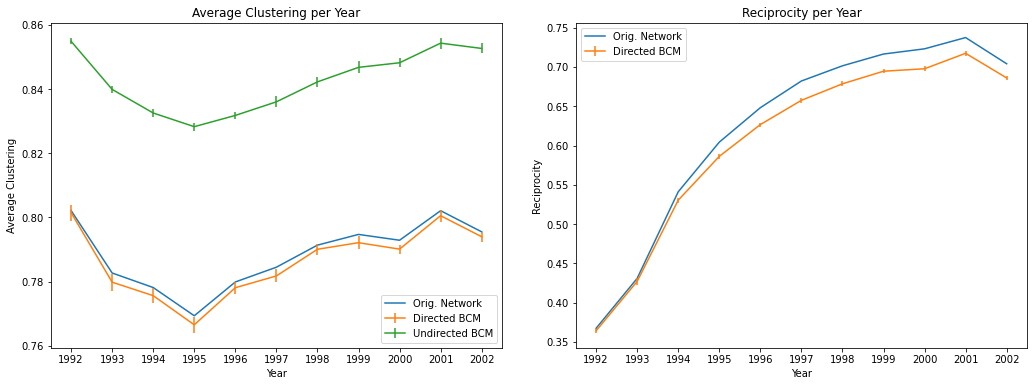

In [8]:
years = list(range(1992, 2003, 1))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_title('Average Clustering per Year')
ax1.set_xlabel('Year')
ax1.set_xticks(years)
ax1.set_ylabel('Average Clustering')
ax1.plot(years, clust_pa_orig, label = 'Orig. Network')
ax1.errorbar(years, clust_pa_dbcm_rnd, yerr= sd_clust_pa_dbcm_rnd, label = 'Directed BCM')
ax1.errorbar(years, clust_pa_ubcm_rnd, yerr= sd_clust_pa_ubcm_rnd, label = 'Undirected BCM')
ax1.legend()

ax2.set_title('Reciprocity per Year')
ax2.set_xlabel('Year')
ax2.set_xticks(years)
ax2.set_ylabel('Reciprocity')
ax2.plot(years, reci_pa_orig, label = 'Orig. Network')
ax2.errorbar(years, reci_pa_dbcm_rnd, yerr= sd_reci_pa_dbcm_rnd, label = 'Directed BCM')
ax2.legend()

fig.tight_layout(pad=3.0)
plt.show()

# A06.2 Weighted ERGMs
Task: Repeat the analysis of point 1 with weighted networks.
- Measure strength assortativity coefficient on the data.
- Fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method.
- Sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std dev.
- Plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples.
- DECM: plot all pairs of assortativity (in-in, in-out, out-out).

In [21]:
samples = 30

str_assort_pa_dir_ii = []
str_assort_pa_dir_oo = []
str_assort_pa_dir_io = []

str_assort_pa_decm_ii = []
str_assort_pa_decm_oo = []
str_assort_pa_decm_io = []

str_assort_pa_ud = []
str_assort_pa_uecm = []
sd_str_assort_pa_uecm = []

for i in range(len(myfiles)):
    print("/data/World_Trade_Web/" + myfiles[i])
    g = nx.read_graphml("./data/World_Trade_Web/" + myfiles[i])
    
    assort_decm_ii = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "in", weight='weight')
    assort_decm_oo = nx.degree_pearson_correlation_coefficient(g, x = "out", y = "out", weight='weight')
    assort_decm_io = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "out", weight='weight')
    assort_ud = nx.degree_pearson_correlation_coefficient(g.to_undirected(), weight='weight')

    adj_kar_dir = nx.to_numpy_array(g)
    adj_kar_undir = nx.to_numpy_array(g.to_undirected())
    
    uecm = UndirectedGraph(adj_kar_undir)
    decm = DirectedGraph(adj_kar_dir)
    
    uecm.solve_tool(model="crema", method="newton", initial_guess="random", adjacency="cm_exp", 
                    method_adjacency="newton", max_steps = 5000)
    
    decm.solve_tool(model="crema", method="newton", initial_guess="random", adjacency="dcm_exp", 
                    method_adjacency="newton", max_steps = 5000)
    
    print(myfiles[i], " - DECM rel. error strength: ", decm.relative_error_strength, ", UECM rel. error strength: ", uecm.relative_error_strength)
    print("")
    
    uecm.ensemble_sampler(samples, cpu_n=12, output_dir="samples/uecm/")
    decm.ensemble_sampler(samples, cpu_n=12, output_dir="samples/decm/")
    
    # Lists to store sample results
    str_assort_uecm = []
    str_assort_decm_ii = []
    str_assort_decm_oo = []
    str_assort_decm_io = []
    
    for j in range(samples):
        edgelist_ens_uecm = np.loadtxt(f"samples/uecm/{j}.txt")
        edgelist_ens_decm = np.loadtxt(f"samples/decm/{j}.txt")
        
        ens_adj_uecm = build_adjacency_from_edgelist(edgelist = edgelist_ens_uecm, is_directed = False, 
                                                     is_sparse = False, is_weighted = True)
        
        ens_adj_decm = build_adjacency_from_edgelist(edgelist = edgelist_ens_decm, is_directed = True, 
                                                     is_sparse = False, is_weighted = True)
        
        g_uecm = nx.from_numpy_array(ens_adj_uecm)
        g_decm = nx.from_numpy_array(ens_adj_decm, create_using = nx.DiGraph())
        
        str_assort_uecm.append(nx.degree_pearson_correlation_coefficient(g_uecm, weight='weight'))
        str_assort_decm_ii.append(nx.degree_pearson_correlation_coefficient(g_decm, x = "in", y = "in", weight='weight'))
        str_assort_decm_oo.append(nx.degree_pearson_correlation_coefficient(g_decm, x = "out", y = "out", weight='weight'))
        str_assort_decm_io.append(nx.degree_pearson_correlation_coefficient(g_decm, x = "in", y = "out", weight='weight'))
        
    str_assort_pa_dir_ii.append(assort_decm_ii)
    str_assort_pa_dir_io.append(assort_decm_oo)
    str_assort_pa_dir_oo.append(assort_decm_io)
    
    str_assort_pa_decm_ii.append(np.mean(str_assort_decm_ii))
    str_assort_pa_decm_oo.append(np.mean(str_assort_decm_oo))
    str_assort_pa_decm_io.append(np.mean(str_assort_decm_io))
    
    str_assort_pa_ud.append(assort_ud)
    str_assort_pa_uecm.append(np.mean(str_assort_uecm))
    sd_str_assort_pa_uecm.append(np.std(str_assort_uecm))
    

/data/World_Trade_Web/WDN_1992.txt.graphml

solution error = 0.021284308284521103

solution error = 373459.36444091797
WDN_1992.txt.graphml  - DECM rel. error strength:  1.4288029483882724e-06 , UECM rel. error strength:  1.3940431447421827e-08

/data/World_Trade_Web/WDN_1993.txt.graphml

solution error = 55099.7453738451

solution error = 108958.6449584961
WDN_1993.txt.graphml  - DECM rel. error strength:  4.236841080092112e-05 , UECM rel. error strength:  0.0003627470022169086

/data/World_Trade_Web/WDN_1994.txt.graphml

solution error = 0.07216095738112926

solution error = 226964.0541381836
WDN_1994.txt.graphml  - DECM rel. error strength:  0.00026850014117039056 , UECM rel. error strength:  7.520024287723114e-09

/data/World_Trade_Web/WDN_1995.txt.graphml

solution error = 0.08294517546892166

solution error = 296446.07635498047
WDN_1995.txt.graphml  - DECM rel. error strength:  0.0005621307284271304 , UECM rel. error strength:  4.584067962714612e-09

/data/World_Trade_Web/WDN_199

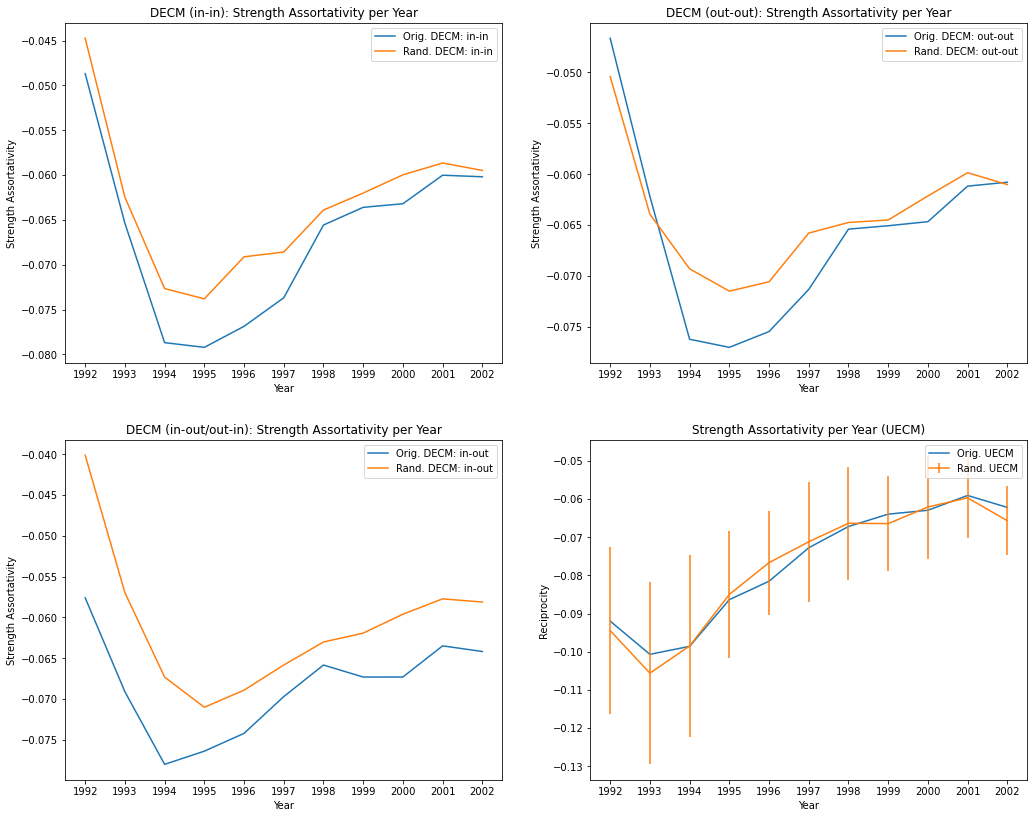

In [24]:
years = list(range(1992, 2003, 1))

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax1.plot(years, str_assort_pa_dir_ii, label = "Orig. DECM: in-in")
ax1.plot(years, str_assort_pa_decm_ii, label = "Rand. DECM: in-in")
ax1.set_title('DECM (in-in): Strength Assortativity per Year')
ax1.set_xlabel("Year")
ax1.set_xticks(years)
ax1.set_ylabel("Strength Assortativity")
ax1.legend()

ax2.plot(years, str_assort_pa_dir_oo, label = "Orig. DECM: out-out")
ax2.plot(years, str_assort_pa_decm_oo, label = "Rand. DECM: out-out")
ax2.set_title('DECM (out-out): Strength Assortativity per Year')
ax2.set_xlabel("Year")
ax2.set_xticks(years)
ax2.set_ylabel("Strength Assortativity")
ax2.legend()

ax3.plot(years, str_assort_pa_dir_io, label = "Orig. DECM: in-out")
ax3.plot(years, str_assort_pa_decm_io, label = "Rand. DECM: in-out")
ax3.set_title('DECM (in-out/out-in): Strength Assortativity per Year')
ax3.set_xlabel("Year")
ax3.set_xticks(years)
ax3.set_ylabel("Strength Assortativity")
ax3.legend()

ax4.plot(years, str_assort_pa_ud, label = "Orig. UECM")
# ax4.plot(years, str_assort_per_year_uecm, label = "Rand. UECM")
ax4.errorbar(years, str_assort_pa_uecm, yerr= sd_str_assort_pa_uecm, label = 'Rand. UECM')
ax4.set_title('Strength Assortativity per Year (UECM)')
ax4.set_xlabel("Year")
ax4.set_xticks(years)
ax4.set_ylabel("Reciprocity")
ax4.legend()

fig.tight_layout(pad=3.0)
plt.show()

# A06.3 Drawing conclusions
Write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach.
You should include at least the following points:
`````
Comment on the interpretation of the clustering & reciprocity coefficients found in the original data
`````
From 1992 to 1995, one can observe the trend of decrease in the clustering coefficient. However, the clustering coefficient had increased from 1995, which has the coefficient of roughly 0.77, except for 2002. Regarding the clustering coefficient, the reciprocity coefficient per year had kept increasing except for 2002. Therefore, it can be interpreted that regardless of the interconnectivity among countries, the likelihood of bilateral trade between countries increased significantly.

`````
Comment on the interpretation of strength assortativity for this dataset
`````
The graphs show a steep decrease in assortativity from 1992 until 1994. However, it shows the trend of increasing after 1994. Therefore, one can interpret that many countries, which used to trade with each other, stopped attaching for trading, but countries formed new trading relations instead. Hence, the trading network is slightly disassortative.

`````
Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models
`````
The UBCM does not fit in the world trade network, as the clustering coefficient is slightly high. It is because it treats the directed nodes as undirected. The DBCM approximates the clustering and the reciprocity. It has the behaviour of our real-world assumption. One can train the Directed Enhanced Configuration Model (DECM) to predict an assortativity coefficient.